In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import seaborn
seaborn.set(style='whitegrid')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter
%matplotlib qt
# %matplotlib inline
from datetime import datetime, date

C:\Users\etiirine\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading in the data

In [2]:
#read in the data
mid = pd.read_csv("MID autosave.tsv", sep="\t", skiprows=lambda x: x <=11,  on_bad_lines="skip")
mid.drop([0,1], inplace=True)
print(mid.describe())
#bring the time data into a new df
time = pd.DataFrame(mid.iloc[:,0::2]) #- get every second column
print(time.describe())
#add elapsed time columns
def elapsed_time(df):
    itr = 0
    counter = len(df.columns)
    masses = [2,4,12,16,18,28,32,40,44,14,5.5,15]
    for i in df:
        timestamp = pd.to_datetime(df[i], format="%Y/%m/%d %H:%M:%S.%f")
        runtime = (timestamp-timestamp[2]).dt.total_seconds()
        colname = "Elapsed time, mass {}".format(masses[itr]) 
        df.insert(counter, colname, runtime)
        itr += 1
        counter += 1
    return(df)
elapsed_time(time)


       mass 2.0_value  mass 4.0_value  mass 12.0_value  mass 16.0_value  \
count    3.100000e+02    3.100000e+02     3.100000e+02     3.100000e+02   
mean     2.296482e-11    5.351003e-13     2.634061e-13     5.379842e-13   
std      6.212140e-12    6.312546e-14     6.562641e-14     1.491926e-13   
min      1.296020e-11    4.137000e-13     1.500000e-13     3.222000e-13   
25%      1.453675e-11    4.553750e-13     1.902500e-13     3.684000e-13   
50%      2.541835e-11    5.646500e-13     2.723500e-13     5.387500e-13   
75%      2.727848e-11    5.789250e-13     3.115000e-13     6.861500e-13   
max      3.299710e-11    6.190000e-13     4.005000e-13     8.368000e-13   

       mass 18.0_value  mass 28.0_value  mass 32.0_value  mass 40.0_value  \
count     3.100000e+02     3.100000e+02     3.100000e+02     2.140000e+02   
mean      1.299035e-12     2.005461e-12     5.775187e-13     7.056290e-13   
std       1.310487e-13     4.974706e-13     5.084885e-13     6.285196e-13   
min       1.0490

,mass 2.0_time,mass 4.0_time,mass 12.0_time,mass 16.0_time,mass 18.0_time,mass 28.0_time,mass 32.0_time,mass 40.0_time,mass 44.0_time,mass 14.0_time,...,"Elapsed time, mass 12","Elapsed time, mass 16","Elapsed time, mass 18","Elapsed time, mass 28","Elapsed time, mass 32","Elapsed time, mass 40","Elapsed time, mass 44","Elapsed time, mass 14","Elapsed time, mass 5.5","Elapsed time, mass 15"
2,2022/11/10 17:01:51.001,2022/11/10 17:01:51.251,2022/11/10 17:01:51.501,2022/11/10 17:01:51.751,2022/11/10 17:01:52.001,2022/11/10 17:01:52.251,2022/11/10 17:01:52.502,2022/11/10 17:01:52.752,2022/11/10 17:01:53.002,2022/11/10 17:01:53.252,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
3,2022/11/10 17:01:57.576,2022/11/10 17:01:57.826,2022/11/10 17:01:58.076,2022/11/10 17:01:58.326,2022/11/10 17:01:58.576,2022/11/10 17:01:58.826,2022/11/10 17:01:59.077,2022/11/10 17:01:59.577,2022/11/10 17:01:59.827,2022/11/10 17:02:00.829,...,6.575,6.575,6.575,6.575,6.575,6.825,6.825,7.577,NaN,NaN
4,2022/11/10 17:02:04.151,2022/11/10 17:02:04.401,2022/11/10 17:02:04.651,2022/11/10 17:02:04.901,2022/11/10 17:02:05.151,2022/11/10 17:02:05.402,2022/11/10 17:02:05.652,2022/11/10 17:02:05.902,2022/11/10 17:02:06.152,2022/11/10 17:02:06.402,...,13.150,13.150,13.150,13.151,13.150,13.150,13.150,13.150,13.902,NaN
5,2022/11/10 17:02:10.726,2022/11/10 17:02:10.976,2022/11/10 17:02:11.226,2022/11/10 17:02:11.476,2022/11/10 17:02:11.726,2022/11/10 17:02:11.977,2022/11/10 17:02:12.727,2022/11/10 17:02:13.979,NaN,NaN,...,19.725,19.725,19.725,19.726,20.225,21.227,NaN,NaN,NaN,NaN
6,2022/11/10 17:02:17.301,2022/11/10 17:02:17.551,2022/11/10 17:02:17.801,2022/11/10 17:02:18.051,2022/11/10 17:02:18.301,2022/11/10 17:02:18.552,2022/11/10 17:02:19.302,2022/11/10 17:02:20.554,NaN,NaN,...,26.300,26.300,26.300,26.301,26.800,27.802,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2022/11/10 17:35:16.376,2022/11/10 17:35:16.626,2022/11/10 17:35:16.876,2022/11/10 17:35:17.126,2022/11/10 17:35:17.376,2022/11/10 17:35:17.627,2022/11/10 17:35:17.877,2022/11/10 17:35:18.377,NaN,NaN,...,2005.375,2005.375,2005.375,2005.376,2005.375,2005.625,NaN,NaN,NaN,NaN
308,2022/11/10 17:35:22.951,2022/11/10 17:35:23.201,2022/11/10 17:35:23.451,2022/11/10 17:35:23.701,2022/11/10 17:35:23.951,2022/11/10 17:35:24.202,2022/11/10 17:35:24.452,2022/11/10 17:35:24.952,NaN,NaN,...,2011.950,2011.950,2011.950,2011.951,2011.950,2012.200,NaN,NaN,NaN,NaN
309,2022/11/10 17:35:29.526,2022/11/10 17:35:29.776,2022/11/10 17:35:30.026,2022/11/10 17:35:30.276,2022/11/10 17:35:30.526,2022/11/10 17:35:30.777,2022/11/10 17:35:31.527,NaN,NaN,NaN,...,2018.525,2018.525,2018.525,2018.526,2019.025,NaN,NaN,NaN,NaN,NaN
310,2022/11/10 17:35:36.101,2022/11/10 17:35:36.351,2022/11/10 17:35:36.601,2022/11/10 17:35:36.851,2022/11/10 17:35:37.101,2022/11/10 17:35:37.352,2022/11/10 17:35:37.602,2022/11/10 17:35:38.102,NaN,NaN,...,2025.100,2025.100,2025.100,2025.101,2025.100,2025.350,NaN,NaN,NaN,NaN


### Orientation of the EGA

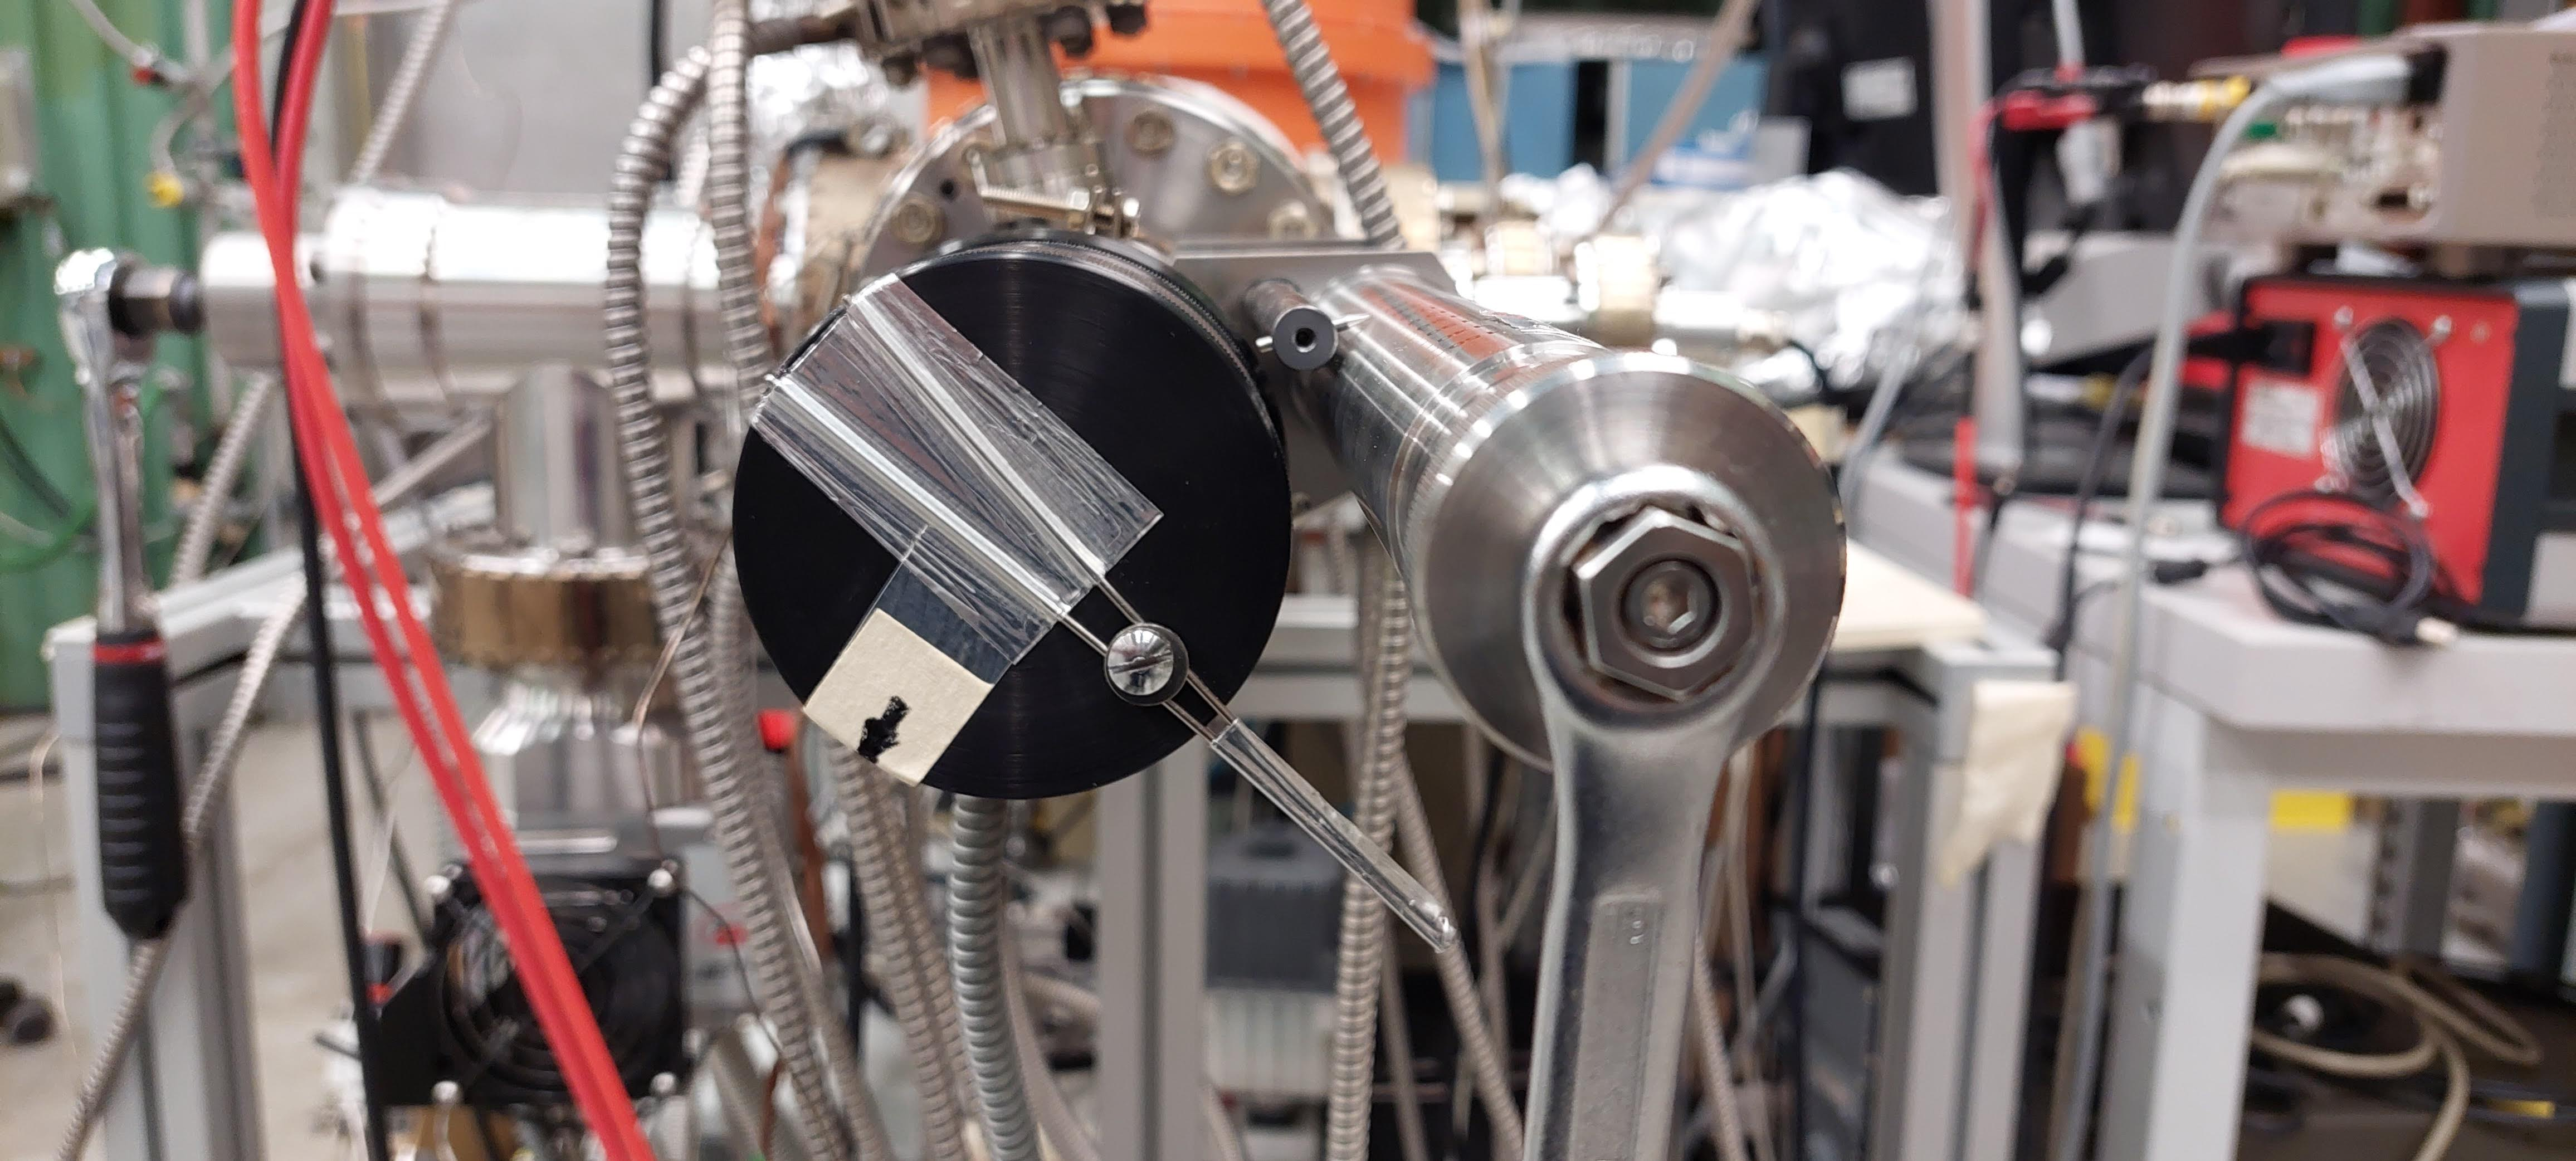
 

<div>
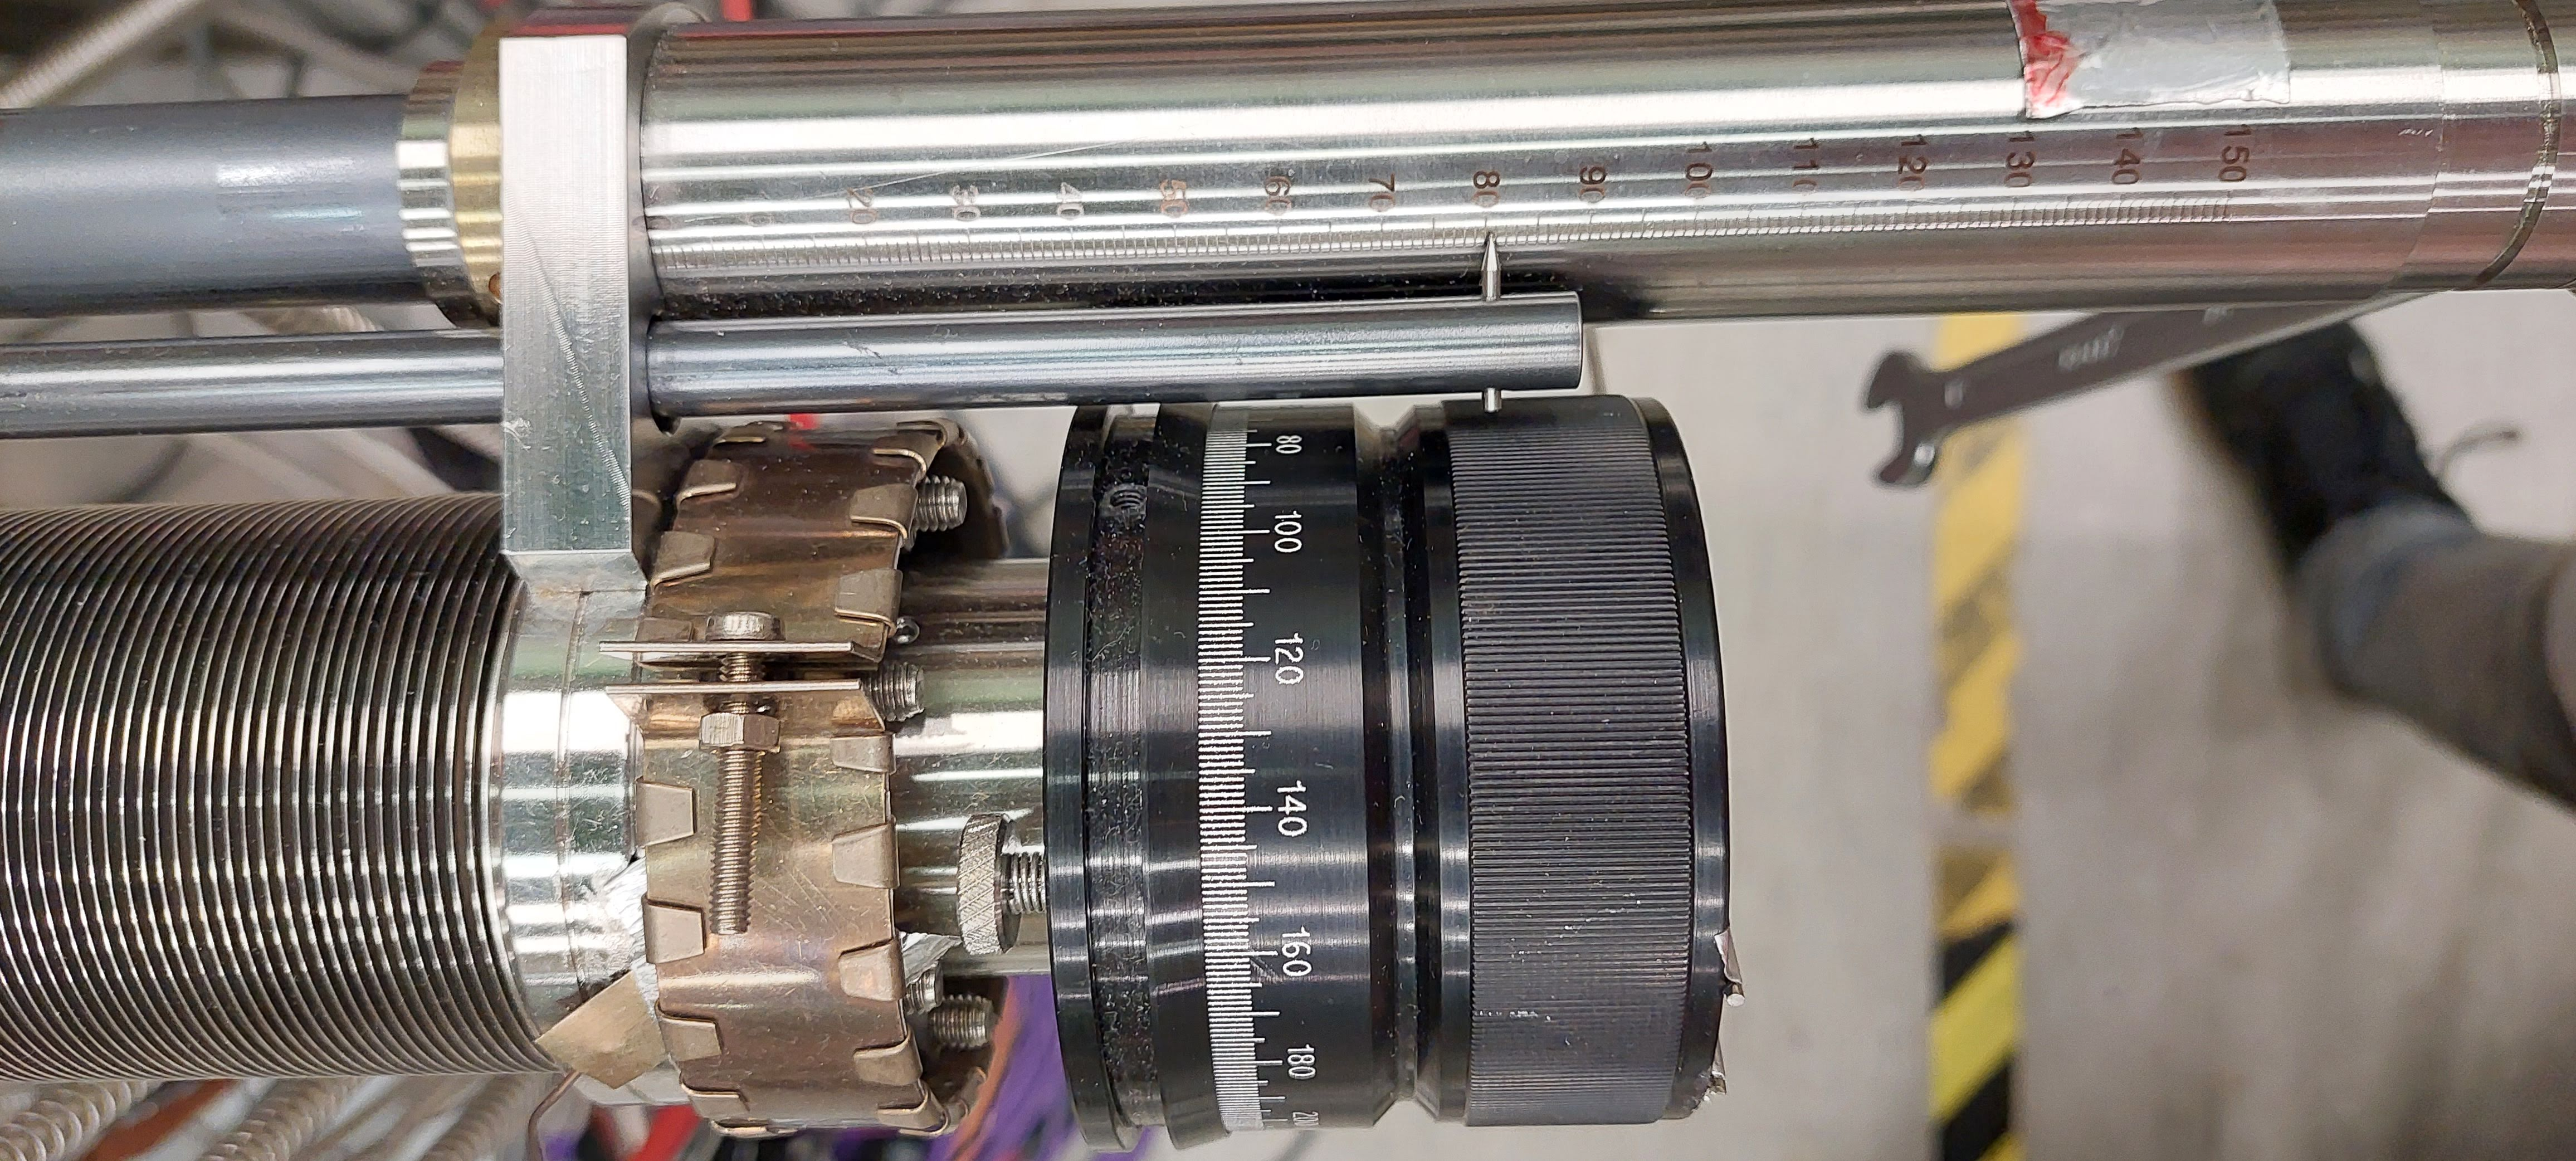
</div>

In [3]:
#reading the Emission current, pressures
vaclog=pd.read_csv("vaclog", sep="\t")
vaclog.head()
#adding an elapsed time column
timestamp=[]
for i in vaclog["Time"]:
    timestamp.append(i)
#making the column into a datetime object
timestamps=pd.to_datetime(vaclog["Time"],format="%d/%m/%Y %H:%M:%S")
runtime=(timestamps-timestamps[0]).dt.total_seconds()    
vaclog.insert(2,"Elapsed time",runtime)
vaclog.drop(index=vaclog.index[0], 
        axis=0, 
        inplace=True)

vaclog.head()

,Live comments,Time,Elapsed time,injection 100mbar,Barion_2,Barion_1,DUAL experiment,DUAL insulation,injection 1mbar,helium,T-platinum,T-CERNOX,I_emission,I_grid
1,NaN,10/11/2022 17:09:46,10.0,-0.067005,4.080000e-09,1.300000e-09,4.996000e-09,0.000003,0.000565,0.0,-88.552,69.584,0.0,NaN
2,NaN,10/11/2022 17:09:55,19.0,-0.066608,4.070000e-09,1.300000e-09,4.996000e-09,0.000003,0.000586,0.0,-88.327,69.584,0.0,NaN
3,NaN,10/11/2022 17:10:04,28.0,-0.070974,4.070000e-09,1.300000e-09,4.996000e-09,0.000003,0.000573,0.0,-88.440,69.584,0.0,NaN
4,NaN,10/11/2022 17:10:13,37.0,-0.067005,4.060000e-09,1.300000e-09,4.996000e-09,0.000003,0.000564,0.0,-87.991,69.360,0.0,NaN
5,NaN,10/11/2022 17:10:22,46.0,-0.071120,4.060000e-09,1.300000e-09,4.996000e-09,0.000003,0.000586,0.0,-88.103,69.584,0.0,NaN


In [4]:
#Reading in the HiVolta measurement file to get the grid current
hv = pd.read_csv("hv log", sep=",")
#hv.drop(columns=["Vmon1","Vmon2","Vmon3","Vmon4","Vmon5","Vmon6","Vmon7","Vmon8","Imon3","Imon4","Imon5","Imon6","Imon7","Imon8","Comments1"], inplace=True)
hv["hv_grid"]=[element * 1e-6 for element in hv["IMon1"]]
hv["em"]=[element * 1e-6 for element in hv["IMon2"]]
hv.drop(hv.columns[hv.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
hv["em"]=abs(hv["em"])
hv["hv_grid"]=abs(hv["hv_grid"])

#adding an elapsed time column
timestamp=[]
for i in hv["Time"]:
    timestamp.append(i)
    
#making the column into a datetime object
timestamps=pd.to_datetime(hv["Time"],format="%H:%M:%S.%f")
runtime=(timestamps-timestamps[0]).dt.total_seconds()    
hv.insert(2,"Elapsed time",runtime)
hv.drop(index=hv.index[0], 
        axis=0, 
        inplace=True)

hv.describe()



,Elapsed time,VMon1,VMon2,VMon3,VMon4,VMon5,VMon6,VMon7,VMon8,IMon1,IMon2,IMon3,IMon4,IMon5,IMon6,IMon7,IMon8,hv_grid,em
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.0,1287.0,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,785.994253,262.249977,98.973318,986.189138,985.861880,916.103776,0.0,0.0,2.000000e-02,-0.081235,-1.380210,27.991639,25.910487,12.217814,-0.007931,-0.014231,-0.010963,8.829075e-08,1.386164e-06
std,446.766905,249.167072,10.379143,111.737069,114.890347,275.568162,0.0,0.0,3.574919e-16,0.081779,0.496773,6.695157,6.464605,2.140378,0.001697,0.000409,0.001110,7.409993e-08,4.798959e-07
min,1.189000,0.060000,0.040000,0.020000,0.060000,0.000000,0.0,0.0,2.000000e-02,-0.532600,-1.812500,-26.666600,-24.826600,0.112500,-0.010900,-0.015000,-0.013200,1.010000e-08,1.000000e-08
25%,399.583500,0.120000,100.060000,999.980000,1000.140000,1000.080000,0.0,0.0,2.000000e-02,-0.158300,-1.780800,28.792050,26.684750,11.672400,-0.010200,-0.014600,-0.011600,2.930000e-08,8.850500e-07
50%,786.059000,499.900000,100.060000,1000.000000,1000.160000,1000.140000,0.0,0.0,2.000000e-02,-0.031200,-1.779700,29.732100,27.629000,12.379200,-0.007600,-0.014200,-0.011000,3.120000e-08,1.779700e-06
75%,1172.532000,499.980000,100.060000,1000.000000,1000.180000,1000.160000,0.0,0.0,2.000000e-02,-0.029300,-0.883900,30.141650,28.042350,12.734100,-0.006500,-0.014100,-0.010500,1.588500e-07,1.780800e-06
max,1558.955000,500.000000,100.140000,1000.020000,1000.200000,1000.160000,0.0,0.0,2.000000e-02,0.483600,0.907600,30.365200,28.261300,17.632000,-0.005300,-0.013300,-0.008200,5.326000e-07,1.812500e-06


### Data processing

In [5]:
#Filtering background signal

#Find the timestamp where emission was turned on
#print("Result 1:",hv.loc[hv["Comment"]=="emission start"])
x=pd.Timestamp(2022, 11, 10, 17,12, 45)

#then find the time value closest to it in the MID scan file
print("\n","Result 2:",mid.iloc[(pd.to_datetime(mid['mass 2.0_time'],format="%Y/%m/%d %H:%M:%S") - x).abs().argsort(),:])

#average the signal before this timestamp and subtract it from the Em-on part
bck=np.mean(mid["mass 40.0_value"])
print("\n","Result 3:",bck)

#apply background correction to the rest of the mass spectrum
mid["mass 2, corr"]=mid["mass 2.0_value"]-bck
print("Res 1:",mid["mass 2, corr"].describe())

#From the signal, get the partial pressures 
h2_sens=8.88e-3
p_h2=mid["mass 2, corr"][102:195]/h2_sens
print(p_h2.describe())

#baseline for partial pressure delta
base_h2=mid["mass 2, corr"][0:102]/h2_sens
base_h2.describe()


 Result 2:                mass 2.0_time  mass 2.0_value            mass 4.0_time  \
101  2022/11/10 17:12:41.926    1.457700e-11  2022/11/10 17:12:42.176   
102  2022/11/10 17:12:48.501    2.179610e-11  2022/11/10 17:12:48.751   
100  2022/11/10 17:12:35.351    1.437860e-11  2022/11/10 17:12:35.601   
103  2022/11/10 17:12:55.076    2.647080e-11  2022/11/10 17:12:55.326   
99   2022/11/10 17:12:28.776    1.441030e-11  2022/11/10 17:12:29.026   
..                       ...             ...                      ...   
307  2022/11/10 17:35:16.376    2.504800e-11  2022/11/10 17:35:16.626   
308  2022/11/10 17:35:22.951    2.540280e-11  2022/11/10 17:35:23.201   
309  2022/11/10 17:35:29.526    2.536080e-11  2022/11/10 17:35:29.776   
310  2022/11/10 17:35:36.101    2.498460e-11  2022/11/10 17:35:36.351   
311  2022/11/10 17:35:42.676    2.485830e-11  2022/11/10 17:35:42.926   

     mass 4.0_value           mass 12.0_time  mass 12.0_value  \
101    4.384000e-13  2022/11/10 17:12:42.426  

count    1.020000e+02
mean     1.557862e-09
std      1.625523e-10
min      1.380019e-09
25%      1.538795e-09
50%      1.551162e-09
75%      1.557364e-09
max      2.901483e-09
Name: mass 2, corr, dtype: float64

In [6]:
#CO

#Find the timestamp where emission was turned on
#print("Result 1:",hv.loc[hv["Comment"]=="emission start"])
x=pd.Timestamp(2022, 11, 10, 17,12, 45)

#then find the time value closest to it in the MID scan file
print("\n","Result 2:",mid.iloc[(pd.to_datetime(mid['mass 28.0_time'],format="%Y/%m/%d %H:%M:%S") - x).abs().argsort(),:])

#average this signal and subtract it from the Em-on part
bck=np.mean(mid["mass 28.0_value"][0:102])
print("\n","Result 3:",bck)

#apply background correction to the rest of the mass spectrum
mid["mass 28, corr"]=mid["mass 28.0_value"][102:]-bck
mid["mass 28, corr"].describe()

#getting the differential spectrum
#first get the timestamp where grid voltage was changed to -500V
print("Location:",hv.loc[hv["Comment"]=="grid repelling"])
y=pd.Timestamp(2022, 11, 10, 17,22, 56)

#then find the time value closest to it in the MID scan file
print("\n","Result 4:",mid.iloc[(pd.to_datetime(mid['mass 28.0_time'],format="%Y/%m/%d %H:%M:%S") - y).abs().argsort(),:])

#subtract grid repelling from grid transparent
#getting the mean signal when grid is repelling
grid2=np.mean(mid["mass 28, corr"][195:])
mid["sample sig, mass 28"]=mid["mass 28, corr"][102:195]-grid2
mid["sample sig, mass 28"].describe()



 Result 2:                mass 2.0_time  mass 2.0_value            mass 4.0_time  \
101  2022/11/10 17:12:41.926    1.457700e-11  2022/11/10 17:12:42.176   
102  2022/11/10 17:12:48.501    2.179610e-11  2022/11/10 17:12:48.751   
100  2022/11/10 17:12:35.351    1.437860e-11  2022/11/10 17:12:35.601   
103  2022/11/10 17:12:55.076    2.647080e-11  2022/11/10 17:12:55.326   
99   2022/11/10 17:12:28.776    1.441030e-11  2022/11/10 17:12:29.026   
..                       ...             ...                      ...   
307  2022/11/10 17:35:16.376    2.504800e-11  2022/11/10 17:35:16.626   
308  2022/11/10 17:35:22.951    2.540280e-11  2022/11/10 17:35:23.201   
309  2022/11/10 17:35:29.526    2.536080e-11  2022/11/10 17:35:29.776   
310  2022/11/10 17:35:36.101    2.498460e-11  2022/11/10 17:35:36.351   
311  2022/11/10 17:35:42.676    2.485830e-11  2022/11/10 17:35:42.926   

     mass 4.0_value           mass 12.0_time  mass 12.0_value  \
101    4.384000e-13  2022/11/10 17:12:42.426  

count    9.300000e+01
mean     2.593404e-13
std      2.250033e-13
min     -2.379070e-13
25%      9.989304e-14
50%      2.704930e-13
75%      4.775930e-13
max      5.656930e-13
Name: sample sig, mass 28, dtype: float64

### Plotting

In [7]:
#Plotting the all the relevant MID spectrums
plt.figure(figsize=(14,8))
plt.plot(time['Elapsed time, mass 2'],mid["mass 2.0_value"],marker=".", markersize=4,label='M2')
plt.plot(time['Elapsed time, mass 4'],mid["mass 4.0_value"],marker=".", markersize=4,label='M4')
plt.plot(time['Elapsed time, mass 12'],mid["mass 12.0_value"],marker=".", markersize=4,label='M14')
plt.plot(time['Elapsed time, mass 16'],mid["mass 16.0_value"],marker=".", markersize=4,label='M16')
plt.plot(time['Elapsed time, mass 18'],mid["mass 18.0_value"],marker=".", markersize=4,label='M18')
plt.plot(time['Elapsed time, mass 28'],mid["mass 28.0_value"],marker=".", markersize=4,label='M28')
plt.plot(time['Elapsed time, mass 32'],mid["mass 32.0_value"],marker=".", markersize=4,label='M12')
plt.plot(time['Elapsed time, mass 40'],mid["mass 40.0_value"],marker=".", markersize=4,label='M40')
plt.plot(time["Elapsed time, mass 44"],mid["mass 44.0_value"],marker=".", markersize=4,label='M44')

plt.xlabel('Elapsed time (s)')
plt.ylabel('Ion current (A)')
plt.legend(title="Mol masses", loc="upper right")
plt.title("MID scan, EGA in the middle on a-C @RT, dynamic vacuum")
plt.yscale('log')

In [8]:
#plotting HiVolta log
plt.figure(figsize=(12,6))
plt.plot(hv["Elapsed time"],hv["hv_grid"],marker=".", markersize=4,label='Grid current')
plt.plot(hv["Elapsed time"],hv["em"],marker=".", markersize=4,label='Emission current')
plt.xlabel('Elapsed time (s)')
plt.ylabel('Current (A)')
plt.legend(loc="upper right")
plt.title("HiVolta current recording, EGA in the middle on a-C @RT, dynamic vacuum")
plt.yscale('log')


In [9]:
#Plotting BA2, BA1 pressure
plt.figure(figsize=(10,6))
plt.plot(vaclog["Elapsed time"],vaclog["Barion_2"],marker=".", markersize=4,label='Barion 2')
plt.plot(vaclog["Elapsed time"],vaclog["Barion_1"],marker=".", markersize=4,label='Barion 1')

plt.xlabel('Elapsed time (s)')
plt.ylabel('Pressure (mbar)')
plt.legend()
plt.title("Total pressure evolution, EGA in the middle on a-C @RT, dynamic vacuum")
ax = plt.gca()
ax.set_yscale('log')
plt.tick_params(axis="y", which='minor')
ax.yaxis.set_minor_formatter(LogFormatter(minor_thresholds=(2,0.5)))
plt.show()